# intro

We have three files:
- "/scratch/mmurakami/WAOM/ds_2years.nc" (the first two years as a dataset)
- "/scratch/mmurakami/WAOM/padded_ds_fillna.npz" (the final 4 years with the last bit removed to match the first)
- times (the number of nan values at the start of each array

In [1]:
# load the packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
import gsw
import os

In [3]:
path = "/scratch/mmurakami/WAOM/"

filename = path + "ds_2years.nc"
ds1 = xr.open_dataset(filename)

In [6]:
ds1

<xarray.Dataset>
Dimensions:     (ocean_time: 70081, drifter: 3895)
Coordinates:
  * ocean_time  (ocean_time) int64 0 1 2 3 4 5 ... 70076 70077 70078 70079 70080
  * drifter     (drifter) int64 0 1 2 3 4 5 6 ... 3889 3890 3891 3892 3893 3894
Data variables:
    Xgrid       (ocean_time, drifter) float32 ...
    Ygrid       (ocean_time, drifter) float32 ...
    Zgrid       (ocean_time, drifter) float32 ...
    rho         (ocean_time, drifter) float32 ...
    salt        (ocean_time, drifter) float32 ...
    temp        (ocean_time, drifter) float32 ...

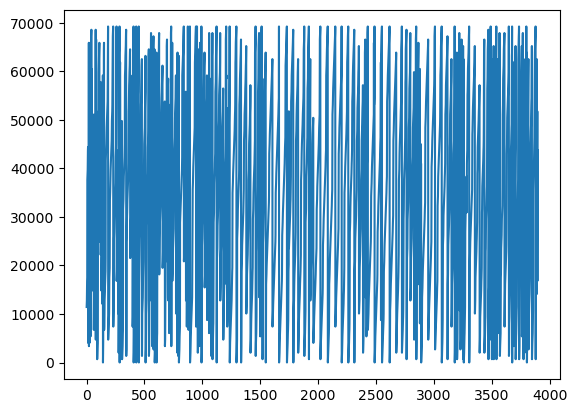

In [7]:
nan_counts = ds1.temp.isnull().sum(dim="ocean_time")
plt.plot(np.arange(1,3896,1),nan_counts.values)

In [8]:
filename = path + "ds_2years_depth.nc"
dsd1 = xr.open_dataset(filename)

In [9]:
filename = path + "ds_4years.nc"
ds2 = xr.open_dataset(filename)

In [10]:
filename = path + "ds_4years_depth.nc"
dsd2 = xr.open_dataset(filename)

In [11]:
times = np.loadtxt("times.txt")
max_time = max(times)
num_nans = max_time - times

In [12]:
num_nans = num_nans.astype(int)

# try a new approach to concatanation

In [13]:
xgrid1 = ds1.Xgrid.values
ygrid1 = ds1.Ygrid.values
zgrid1 = ds1.Zgrid.values
rho1 = ds1.rho.values
salt1 = ds1.salt.values
temp1 = ds1.temp.values
depth1 = dsd1.depth.values

In [14]:
xgrid2 = ds2.Xgrid.values[11:]
ygrid2 = ds2.Ygrid.values[11:]
zgrid2 = ds2.Zgrid.values[11:]
rho2 = ds2.rho.values[11:]
salt2 = ds2.salt.values[11:]
temp2 = ds2.temp.values[11:]
depth2 = dsd2.depth.values[11:]

In [15]:
depth1

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-217.95296 ,  -49.35628 , -143.34093 , ..., -243.40207 ,
        -101.55715 , -195.10144 ],
       [-217.9929  ,  -49.301525, -143.3347  , ..., -243.22562 ,
        -101.53235 , -195.10208 ],
       [-218.03345 ,  -49.24851 , -143.3337  , ..., -243.07152 ,
        -101.50912 , -195.10643 ]], dtype=float32)

In [16]:
test1 = xgrid2[:,0]
test1a = test1[test1 != 0]
test1a = test1a[~np.isnan(test1a)]
test1a.shape

(106794,)

In [17]:
test1 = xgrid2[:,2]
test1a = test1[test1 != 0]
test1a = test1a[~np.isnan(test1a)]
test1a.shape

(84142,)

In [18]:
test1 = xgrid2[:,10]
test1a = test1[test1 != 0]
test1a = test1a[~np.isnan(test1a)]
test1a.shape

(124272,)

In [19]:
# # Fill NaNs from the bottom
# for col in range(xgrid2.shape[1]):  # Loop over columns
#     xgrid2[-num_nans[col]:, col] = np.nan  # Fill last num_nans[col] elements with NaN

# print(xgrid2)

In [20]:
# Xgrid = np.vstack((xgrid1,xgrid2))

In [21]:
# # Count NaNs per column
# num_nans2 = np.isnan(Xgrid).sum(axis=0)

# print(num_nans2)

# np.where(num_nans2 != 69227) # these are the ones that beached

In [18]:
def move_nans_to_end(Xgrid):
    # Get shape
    m, n = Xgrid.shape  
    result = np.full_like(Xgrid, np.nan)  # Initialize result with NaNs

    for col in range(n):
        non_nan_values = Xgrid[:, col][~np.isnan(Xgrid[:, col])]  # Extract non-NaN values
        result[:len(non_nan_values), col] = non_nan_values  # Place them at the top

    return result

# Move NaNs to the end of each column
# Xgrid_rearranged = move_nans_to_end(Xgrid)

# print(Xgrid_rearranged)

In [19]:
del ds1, ds2

In [32]:
print(np.where(np.isnan(xgrid1[:,0]))[0].shape)
print(np.where(np.isnan(xgrid2[:,0]))[0].shape)
print(np.where(xgrid2[:,0]==0)[0].shape)


(11435,)
(1,)
(17477,)


array([453.04388, 453.04437, 453.04492, ...,   0.     ,   0.     ,
             nan], dtype=float32)

# great, now do for y grid and plot to see if we can do this

In [20]:
Xgrid = np.vstack((xgrid1,xgrid2))
print("Xgrid done")
Ygrid = np.vstack((ygrid1,ygrid2))
print("Ygrid done")

Xgrid done
Ygrid done


In [21]:
Zgrid = np.vstack((zgrid1,zgrid2))
print("Zgrid done")
rho = np.vstack((rho1,rho2))
print("rho done")
salt = np.vstack((salt1,salt2))
print("salt done")
temp = np.vstack((temp1,temp2))
print("temp done")

Zgrid done
rho done
salt done
temp done


In [22]:
depth = np.vstack((depth1,depth2))
print("depth done")

depth done


In [23]:
Xgrid_rearranged = move_nans_to_end(Xgrid)
Ygrid_rearranged = move_nans_to_end(Ygrid)

In [24]:
del Xgrid,Ygrid

In [25]:
del xgrid1,xgrid2,ygrid1,ygrid2

In [26]:
Zgrid_rearranged = move_nans_to_end(Zgrid)
print("Zgrid done")
del Zgrid,zgrid1,zgrid2

rho_rearranged = move_nans_to_end(rho)
print("rho done")
del rho,rho1,rho2

temp_rearranged = move_nans_to_end(temp)
print("temp done")
del temp,temp1,temp2

salt_rearranged = move_nans_to_end(salt)
print("salt done")
del salt,salt1,salt2


Zgrid done
rho done
temp done
salt done


In [27]:
depth_rearranged = move_nans_to_end(depth)
print("depth done")
del depth,depth1,depth2

depth done


In [28]:
time_steps = Zgrid_rearranged.shape[0]

In [29]:
num_drifters = Zgrid_rearranged.shape[1]

In [30]:
# Define dimensions and create xarray Dataset
ds = xr.Dataset(
    {
        "Xgrid": (["time", "drifter"], Xgrid_rearranged),
        "Ygrid": (["time", "drifter"], Ygrid_rearranged),
        "Zgrid": (["time", "drifter"], Zgrid_rearranged),
        "rho": (["time", "drifter"], rho_rearranged),
        "temp": (["time", "drifter"], temp_rearranged),
        "salt": (["time", "drifter"], salt_rearranged),
        "depth": (["time", "driftr"], depth_rearranged),
    },
    coords={
        "time": np.arange(time_steps),  # Replace with actual time values if available
        "drifter": np.arange(num_drifters),
    },
)

In [ ]:
# Save to a NetCDF file
file_path = "/scratch/mmurakami/WAOM/drifter_data_all_withdepth.nc"
ds.to_netcdf(file_path, mode="w", format="NETCDF4")
print(f"Saved to {file_path}")

# extra playing around

In [71]:
num_drifters = Xgrid_rearranged.shape[1]
num_drifters

3895

In [109]:
num_nans2 = np.isnan(Xgrid_rearranged).sum(axis=0)

print(num_nans2)

[69227 79957 69227 ... 69227 69227 69227]


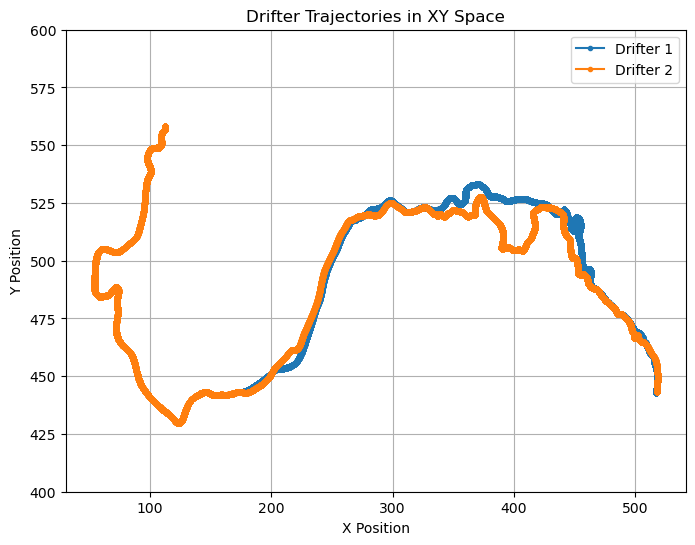

In [126]:
# Plot each drifter's trajectory
plt.figure(figsize=(8, 6))
cut = num_nans2[i]
# for i in range(num_drifters[:10]):
for i in range(2):
    cut = np.sum(np.isnan(Xgrid_rearranged[:,i]) | (Xgrid_rearranged[:,i] == 0))
    plt.plot(Xgrid_rearranged[:-cut, i], Ygrid_rearranged[:-cut, i], marker='.', linestyle='-', label=f'Drifter {i+1}')

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Drifter Trajectories in XY Space")
plt.ylim(400,600)
plt.legend()
plt.grid()
plt.show()